In [38]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
#%pip install statsmodels
#%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------- ----------------------- 4.7/11.1 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 24.8 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
data = pd.read_csv('gapminder.csv').dropna()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
#continent = pd.get_dummies(data['continent']) creates true and falses, but need numerical for regression

#if country isn't in Africa, Americas, Asia, or Europe, then it must be in Oceania
#don't want highly correlated inputs
#collinear, decreases strength of inputs
#need to drop one of the variables and make it reference

continent = pd.get_dummies(data['continent'], drop_first=True).astype(int)
data = pd.concat([data,continent], axis=1) #merge back into data
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,Americas,Asia,Europe,Oceania
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,1,0,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,1,0,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,1,0,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,1,0,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,1,0,0


In [23]:
inputs = ['pop','gdpPercap','year','Americas','Asia','Europe','Oceania'] #independent variables
data[inputs].corr()

,pop,gdpPercap,year,Americas,Asia,Europe,Oceania
pop,1.000000,-0.025600,8.230808e-02,-2.219817e-02,2.459466e-01,-6.062454e-02,-2.334280e-02
gdpPercap,-0.025600,1.000000,2.273181e-01,-3.715837e-03,3.834877e-02,3.809787e-01,1.383432e-01
year,0.082308,0.227318,1.000000e+00,-1.017585e-15,1.403744e-15,2.457989e-15,-4.387178e-15
Americas,-0.022198,-0.003716,-1.017585e-15,1.000000e+00,-2.543436e-01,-2.392372e-01,-5.524946e-02
Asia,0.245947,0.038349,1.403744e-15,-2.543436e-01,1.000000e+00,-2.847707e-01,-6.576498e-02
Europe,-0.060625,0.380979,2.457989e-15,-2.392372e-01,-2.847707e-01,1.000000e+00,-6.185896e-02
Oceania,-0.023343,0.138343,-4.387178e-15,-5.524946e-02,-6.576498e-02,-6.185896e-02,1.000000e+00


In [ ]:
#train the model on practice test, test it on prelim (which is different from practice test)

train, test = train_test_split(data,test_size=0.3, random_state = 2024) 
#random state allows you to access the same random split in the future, makes it repeatable
model = sm.OLS(train['lifeExp'], train[inputs]).fit() #OLS minimizes least squares errors

Text(0, 0.5, 'Actual')

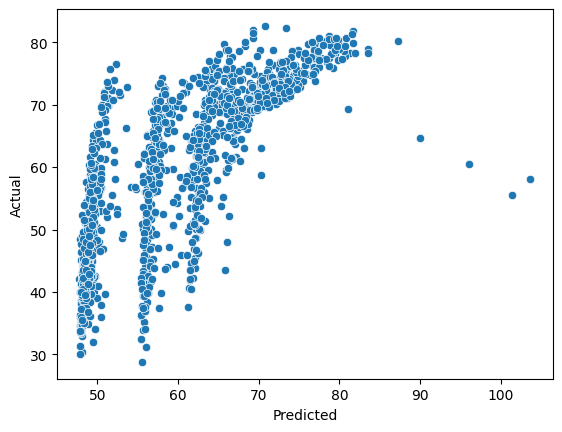

In [33]:
sns.scatterplot(y=train['lifeExp'],x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Residuals')

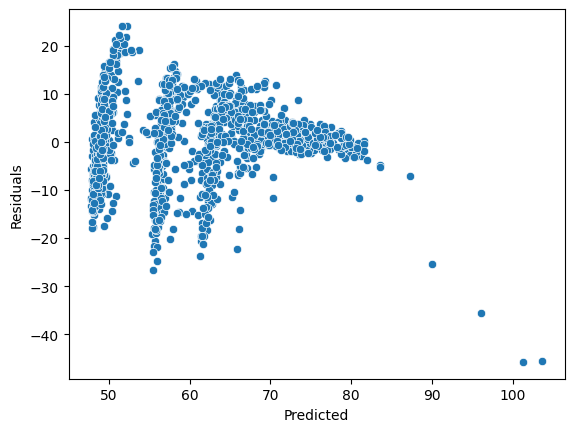

In [ ]:
#see how far off our predictions are from actual value for each input (residuals)
residuals = train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(y=residuals,x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Residuals')
#if residuals plot isn't random, then there's a pattern we should have included in our original model

Text(0, 0.5, 'Residuals')

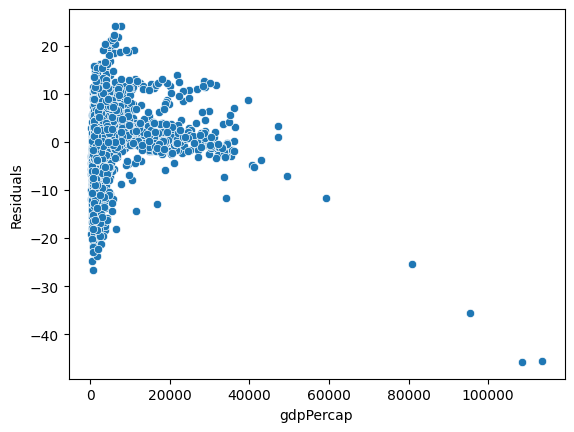

In [ ]:
residuals = train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(y=residuals,x=train['gdpPercap'])
plt.xlabel('gdpPercap')
plt.ylabel('Residuals')
#heteroskedastic means variance of the residuals in a regression model is not constant across all values of the independent variable
#fan shape, variance is higher when GDP is closer to 0

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

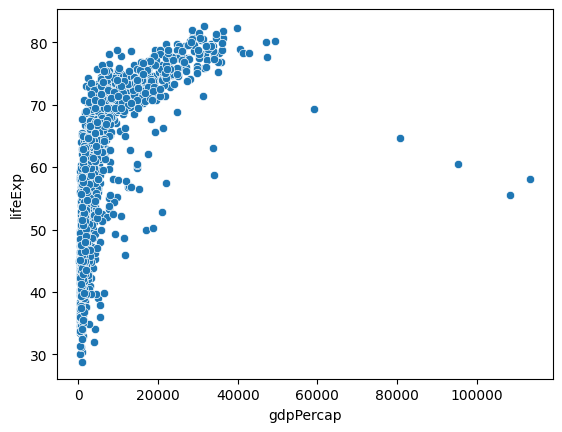

In [ ]:
sns.scatterplot(y=train['lifeExp'], x=train['gdpPercap'])
#looks logarithmic

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

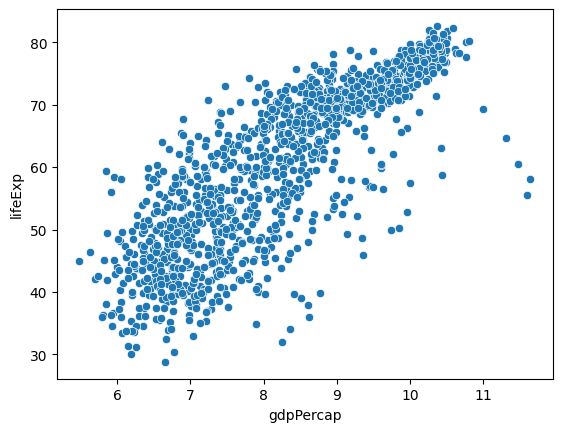

In [39]:
sns.scatterplot(y=train['lifeExp'], x=np.log(train['gdpPercap']))

In [40]:
data['gdpPercap'] = np.log(data['gdpPercap'])
data['pop'] = np.log(data['pop'])

In [41]:
data['year'] = data['year'] - 1952 #there will be scaling problems when comparing this to log gdpPercap and log pop


In [42]:
train, test = train_test_split(data, test_size = 0.3, random_state = 2024)

In [43]:
model = sm.OLS(train['lifeExp'],train[inputs]).fit()

Text(0, 0.5, 'Residuals')

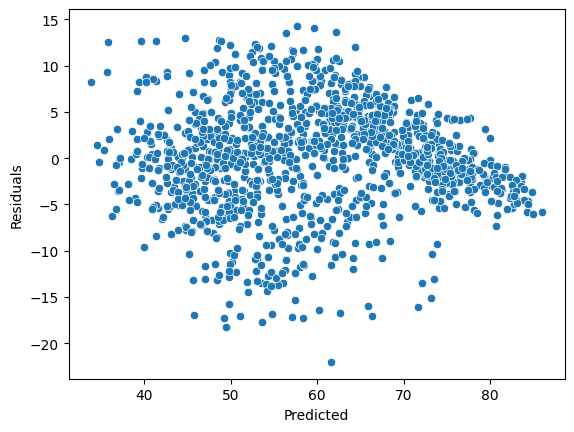

In [45]:
residuals = train['lifeExp'] - model.predict(train[inputs])
sns.scatterplot(y=residuals,x=model.predict(train[inputs]))
plt.xlabel('Predicted')
plt.ylabel('Residuals')

In [46]:
mean_absolute_error(y_true=train['lifeExp'],y_pred=model.predict(train[inputs]))

4.398039801468958

In [ ]:
mean_absolute_error(y_true=test['lifeExp'],y_pred=model.predict(test[inputs]))
#similar means we aren't overfitting 

4.582374627265796

In [ ]:
print(model.summary())
#prob(f statistic): is this model significant, <0.05 in this case, very unlikely to see these results due to random chance

                                 OLS Regression Results                                
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.907e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        17:56:00   Log-Likelihood:                         -3768.5
No. Observations:                1192   AIC:                                      7551.
Df Residuals:                    1185   BIC:                                      7587.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------